# **Лабораторная работа №8 по вычислительной математикe.**

## Работу выполнил: Шурыгин Антон, Б01 - 909.

### **XI.9.5**

image.png

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
step = 0.005

In [64]:
def zero(x):
    return 0

def P_sqr2(x):
    return 10 + np.sin(2 * np.pi * x)

def func(x):
    return np.cos(2 * np.pi * x)

### Представляем разностную, преобразовав линейную задачу, в виде:

\begin{equation*}
 \begin{cases}
   \mu_0 y_0 + \mu_1 \frac{y_{1} - y_{0}}{h} = \varphi_0
    \\
   \frac{y_{n+1} - 2y_n - y_{n-1}}{h^{2}} + p_n \frac{y_{n+1} - y_{n-1}}{2h} + q_n y_n = f_n 
    \\
   v_0 y_N + v_1 \frac{y_N - y_{N-1}}{h} = \varphi_1
 \end{cases}
\end{equation*}

### Для определения значений сеточной функции получается СЛАУ с трехдиагональной матрицей:

$$
Ay = f
$$

\begin{equation*}
 \begin{cases}
    a_0 y_1 + b_0 y_0 = d_0
    \\
    a_n y_{n+1} + b_n y_n + c_n y_{n-1} = d_n
    \\
    b_N + y_N + c_N y_{N-1} = d_N
 \end{cases}
\end{equation*}

### Решаем методом прогонки, находим коэффициенты $a_k, b_k, c_k$:

$$
a_k =  1 - \frac{p_k h}{2}
$$
$$
c_k =  1 + \frac{p_k h}{2}
$$
$$
b_k = 2 - q_k h^{2}
$$

### Решение ищем в виде прогоночного соотношения:

$$
y_{n-1} = p_{n-1} + y_n q_{n-1}
$$

где P_n, Q_n - прогоночные коэффициенты.

$$
p_n = \alpha_{n+1} p_{n+1} + \beta_{n+1}
$$

$$
q_n = \alpha_{n+1} q_{n+1} + \gamma_{i + 1} 
$$

Отсюда рекуррентные формулы для прогоночных коэффициентов будут равны:

$$
\alpha_{n+1} = \frac{c_n}{b_n - a_n \alpha_n}
$$

$$
\beta_{n+1}  = \frac{a_n \beta_n - \varphi_n}{b_n - \alpha_n a_n}
$$

$$
\gamma_{n+1} = \frac{a_n \gamma_n}{b_n - \alpha_n a_n}
$$

И решение исходной задачи будет:

$$
y_N = \mu_N y_0 + v_n
$$
$$
y_0 = \frac{v_0}{1 - \mu_0}
$$
$$
y_{n-1} = a_n y_n + \beta_n + \gamma_n y_N
$$

где

$$
\mu_N = \frac{-c_N}{a_N(\alpha_N + \gamma_N) - b_N}
$$

$$
v_N = \frac{\varphi_N - a_N \beta_N}{a_N(\alpha_N + \gamma_N) - b_N}
$$

$$
\mu_{n-1} = \alpha_n \mu_n + \gamma_n \mu_N 
$$

$$
v_{n-1} = \beta_n + \alpha_n v_n + \gamma_n v_N
$$

In [155]:
def init(p, q, f, h):
    N = int(1/h)
    
    A = np.zeros([N, N])
    F = np.zeros(N)
    
    for i in range(N):
        A[i][i] = - 2 + q(i * h) * h ** 2
        
        if i != 0:
            A[i][i - 1] = 1 + p(i) * h / 2

        F[i] = f(i * h) * h ** 2

    for i in range(N - 1):
        A[i][i + 1] = 1 - p(i * h) * h / 2

    A[0][-1] = 1
    A[-1][0] = 1

    return A, F
#
def find_solut(p, q, f, h):
    A, F = init(p, q, f, h)
    numpy_solut = np.linalg.solve(A, F)

    len_F = len(F)
    
    solut = np.zeros(len_F)
    alpha, beta, gamma = np.zeros(len_F - 1),\
                         np.zeros(len_F - 1),\
                         np.zeros(len_F - 1)

    mu, v = np.zeros(len_F), np.zeros(len_F) 

    alpha[1], beta[1], gamma[1] =  -A[0][1] / A[0][0],\
                                   -F[0] / A[0][0],\
                                   -A[0][-1] / A[0][0] 

    # alpla, beta, gamma initializations
    for i in range(1, len_F - 2):
        denom = (- A[i][i] - alpha[i] * A[i][i - 1])
        
        alpha[i + 1] = A[i][i + 1] / denom
        beta[i + 1] = (A[i][i - 1] * beta[i] + F[i]) / denom
        gamma[i + 1] = (A[i][i - 1] * gamma[i]) / denom

    solut[-1] = (beta[-1] + alpha[-1] * beta[1]) / (1 - alpha[-1] * (alpha[1] + gamma[1]) - gamma[-1])
    
    for i in range(len_F - 2, -1, -1):
        solut[i - 1] = alpha[i] * solut[i] + beta[i] + gamma[i] * solut[-1]

    return solut, numpy_solut

In [154]:
def plot(x, y, descr):
    plt.figure(figsize = [12, 8])
    plt.plot(x, y)

    plt.title(descr)
    plt.xlabel("x")
    plt.ylabel("y")

    plt.grid()
    plt.show()

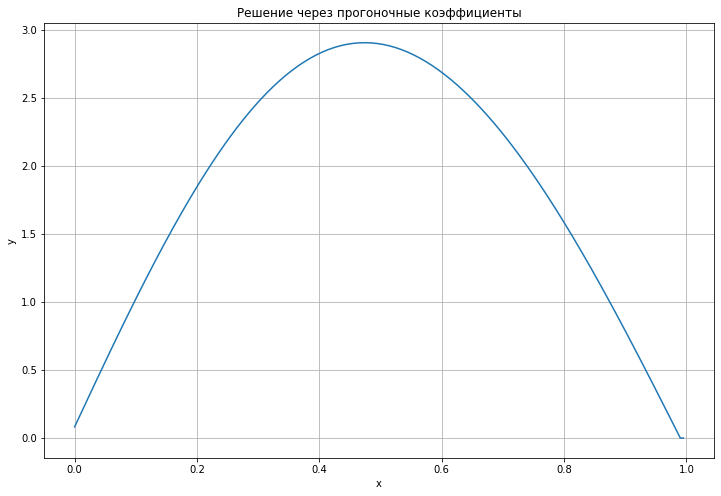

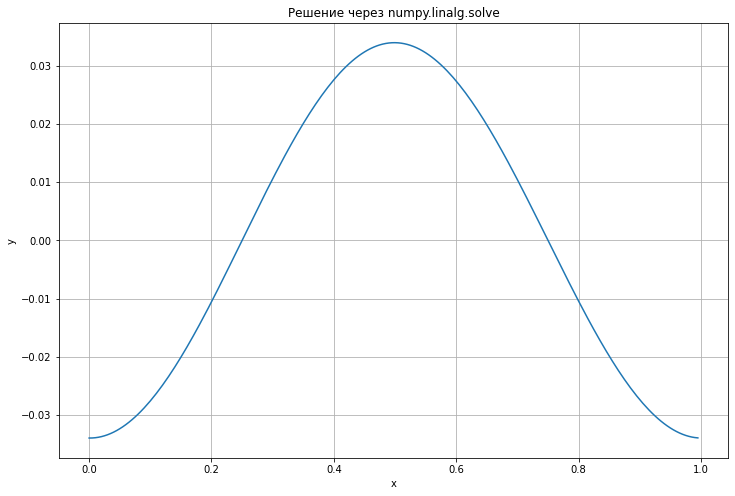

In [157]:
y, numpy_y = find_solut(p=zero, q=P_sqr2, f=func, h=step)
x = np.arange(len(y)) * step


plot(x = x, y = y, descr="Решение через прогоночные коэффициенты")
plot(x = x, y = numpy_y, descr="Решение через numpy.linalg.solve")


    ## mu, v initializations

    #mu[-1] = -A[-1][0] / (A[-1][-2] * (alpha[-1] + gamma[-1]) - A[-1][-1])
    #v[-1] = (F[-1] - A[-1][-2] * beta[-1])/(A[-1][-2] * (alpha[-1] + gamma[-1]) - A[-1][-1])
    
    #for i in range(len_F - 2, -1 , -1):
    #    mu[i - 1] = alpha[i] * mu[i] + gamma[i] * mu[-1]
    #    v[i - 1] = beta[i] + alpha[i] * v[i] + gamma[i] * v[-1]
    
    #solut[0] = v[0]/(1 - mu[0])